In [86]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import pylab
import math
%matplotlib inline
import os

In [87]:
wholesaledf=pd.read_csv('Wholesale+Customers+Data.csv')

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [88]:
wholesaledf

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [89]:
del wholesaledf['Buyer/Spender']

In [90]:
wholesaledf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [91]:
wholesaledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [92]:
wholesaledf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [93]:
wholesaledf['Fresh'].mode()

0        3
1      514
2     3366
3     7149
4     8040
5     9670
6    18044
dtype: int64

In [94]:
wholesaledf['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

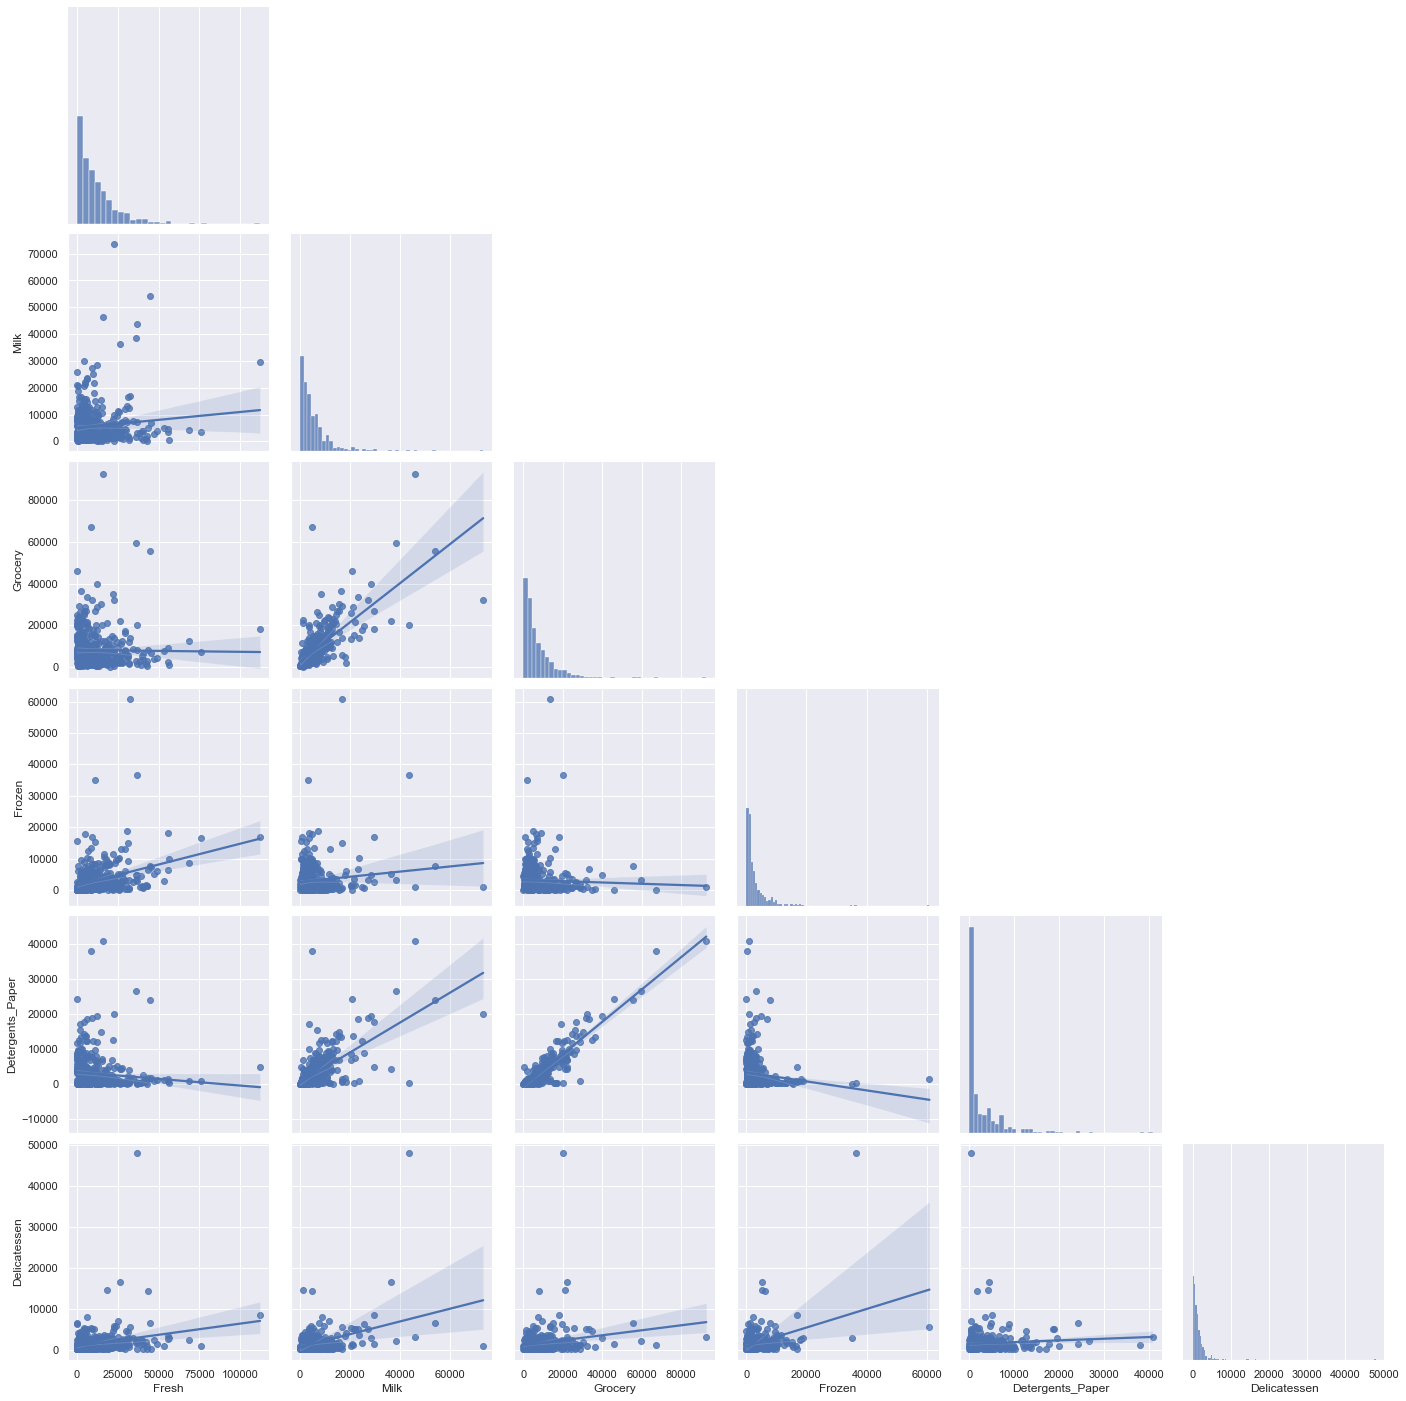

In [95]:
pairplot=sns.pairplot(wholesaledf, kind='reg',corner= True);
pairplot.fig.set_size_inches(20,20)

In [96]:
wholesalecorrdf = wholesaledf.corr()
wholesalecorrdf

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


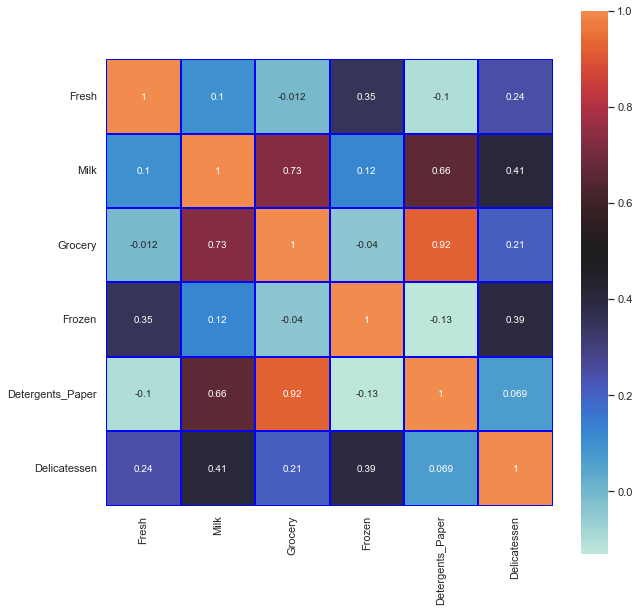

In [97]:
plt.figure(figsize=(10, 10))
sns.heatmap(wholesalecorrdf,annot=True, square= True, linecolor = 'blue',linewidths =2,center=0.5);

Which Region and which Channel spent the most?

In [98]:
wholesalespendingdf=pd.DataFrame(wholesaledf)
wholesalespendingdf['Total Spending']= wholesaledf['Fresh']+wholesaledf['Milk']+wholesaledf['Grocery']+wholesaledf['Frozen']+wholesaledf['Detergents_Paper']+wholesaledf['Delicatessen']
wholesalespendingdf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [99]:
regiondf = wholesalespendingdf.groupby('Region')['Total Spending'].sum()
print(regiondf)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Spending, dtype: int64


In [100]:
pd.DataFrame(regiondf)

,Total Spending
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


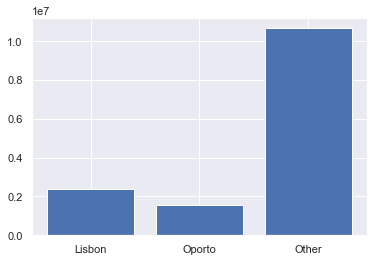

In [101]:
x=['Lisbon','Oporto','Other']
y=[2386813,1555088,10677599]
plt.bar(x,y);

In [102]:
pd.DataFramechanneldf = wholesalespendingdf.groupby('Channel')['Total Spending'].sum()
print(channeldf)

Channel
Hotel     7999569
Retail    6619931
Name: Total Spending, dtype: int64


In [103]:
pd.DataFrame(channeldf)

,Total Spending
Channel,
Hotel,7999569
Retail,6619931


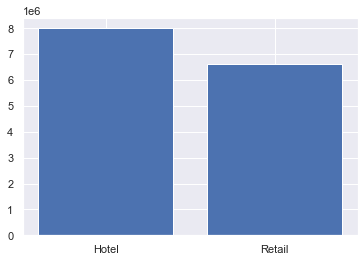

In [104]:
x=['Hotel','Retail']
y=[7999569,6619931]
plt.bar(x,y);

Hence from above information we can say that Other is the highest sepending Region and Oporto is the lowest spending region.

In [105]:
channeldf = wholesalespendingdf.groupby('Channel')['Total Spending'].sum()
print(channeldf)

Channel
Hotel     7999569
Retail    6619931
Name: Total Spending, dtype: int64


Hence from above information we can say that Hotel is the highest sepending Channel and Retail is the lowest spending Channel.

Q 1.2 . There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

For Fresh Products

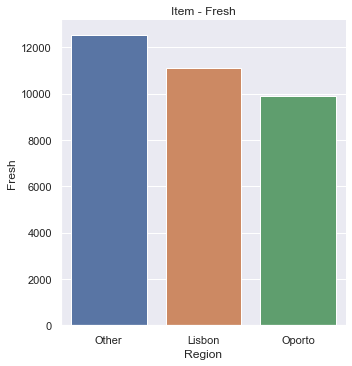

In [106]:
sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=wholesaledf,)
plt.title('Item - Fresh');

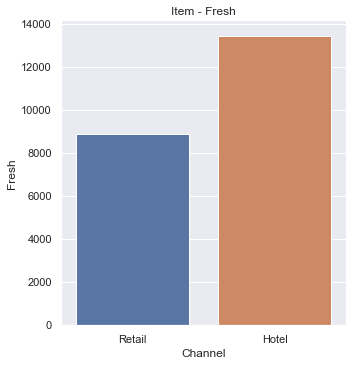

In [107]:
sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Fresh');

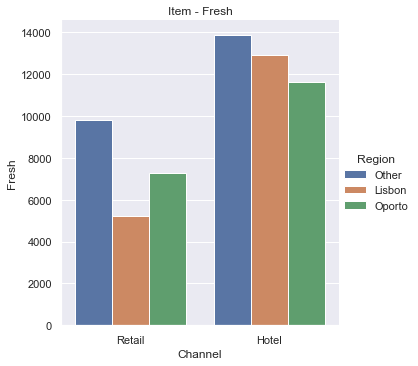

In [108]:
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=wholesaledf,)
plt.title('Item - Fresh');

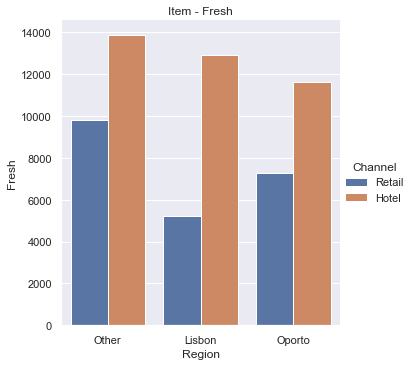

In [109]:
sns.catplot(x="Region", y="Fresh", hue ="Channel", kind="bar", ci=None, data=wholesaledf,)
plt.title('Item - Fresh');

For Milk Product

Text(0.5, 1.0, 'Product - Milk')

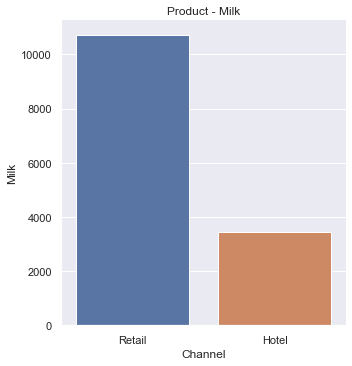

In [110]:
sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Milk')

Text(0.5, 1.0, 'Product - Milk')

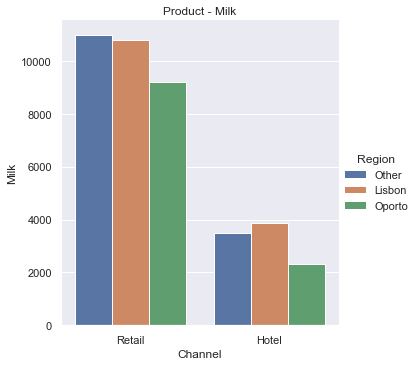

In [111]:
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Milk')

Text(0.5, 1.0, 'Product - Milk')

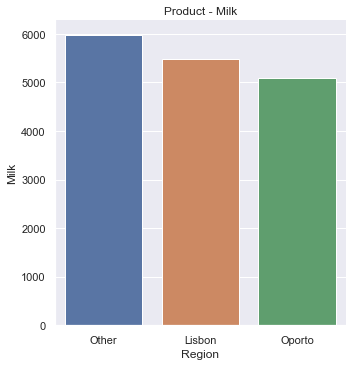

In [112]:
sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Milk')

Text(0.5, 1.0, 'Product - Milk')

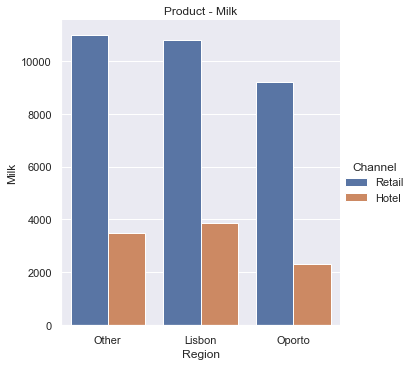

In [113]:
sns.catplot(x="Region", y="Milk", hue='Channel', kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Milk')

Text(0.5, 1.0, 'Product - Grocery')

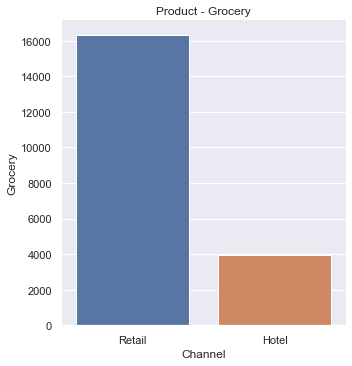

In [114]:
sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

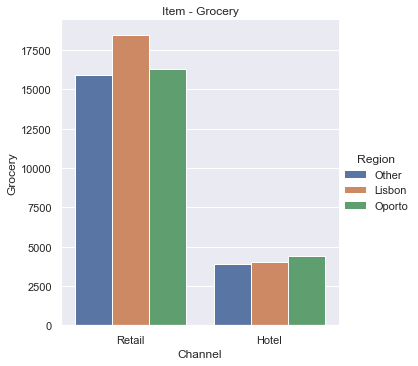

In [115]:
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Product - Grocery')

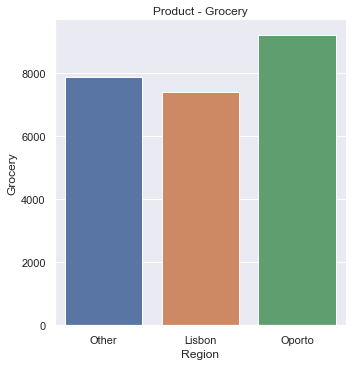

In [116]:
sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=wholesaledf)
plt.title('Product - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

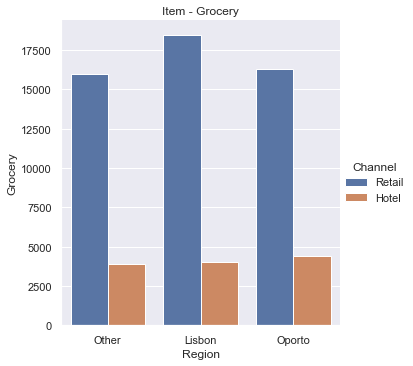

In [117]:
sns.catplot(x="Region", y="Grocery", hue='Channel', kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Grocery')

For Frozen

Text(0.5, 1.0, 'Item - Frozen')

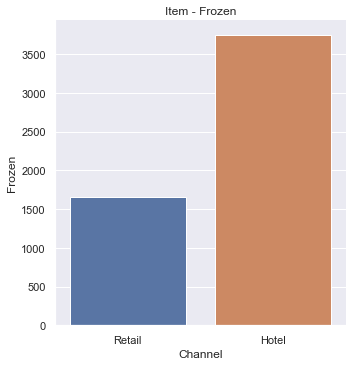

In [118]:
sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

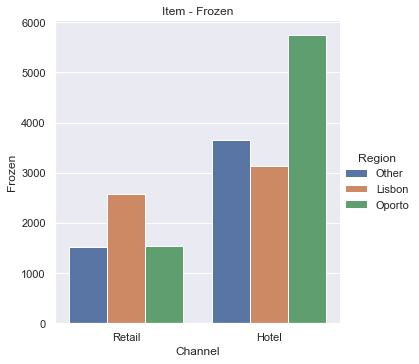

In [119]:
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

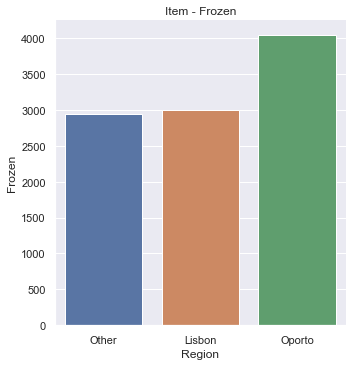

In [120]:
sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

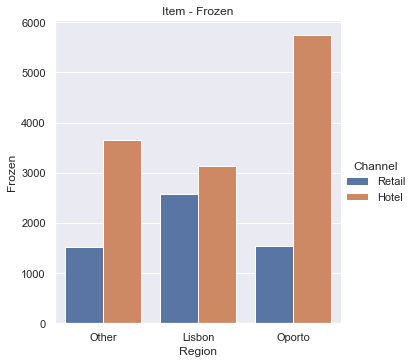

In [121]:
sns.catplot(x="Region", y="Frozen", hue='Channel', kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Frozen')

For Detergents & Paper

Text(0.5, 1.0, 'Item - Detergents_Paper')

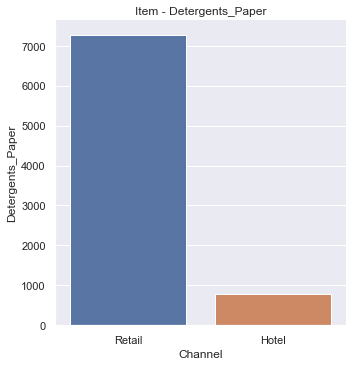

In [122]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

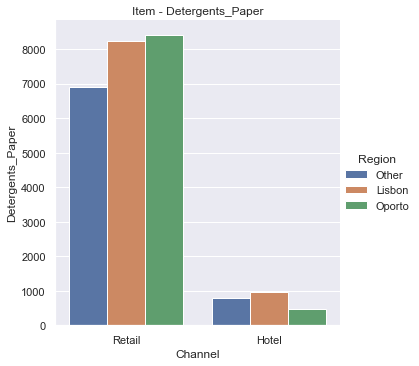

In [123]:
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

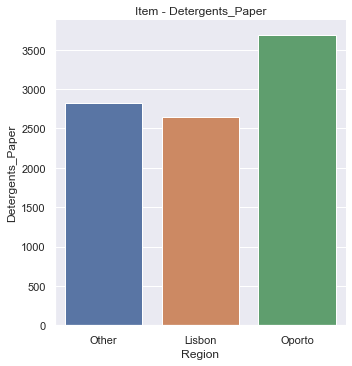

In [124]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

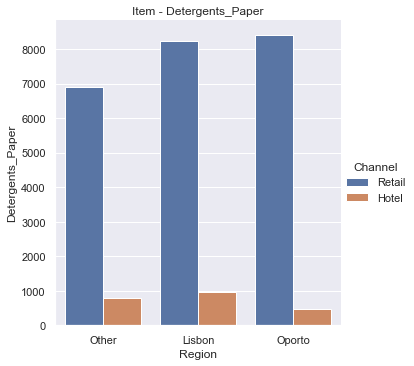

In [125]:
sns.catplot(x="Region", y="Detergents_Paper", hue='Channel', kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Detergents_Paper')

For Delicatessen

Text(0.5, 1.0, 'Item - Delicatessen')

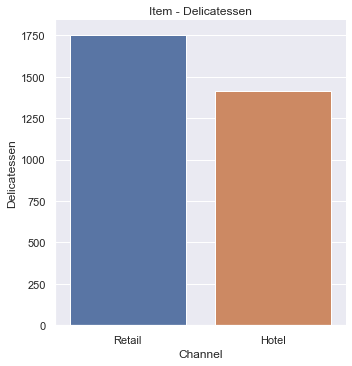

In [126]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Delicatessen')

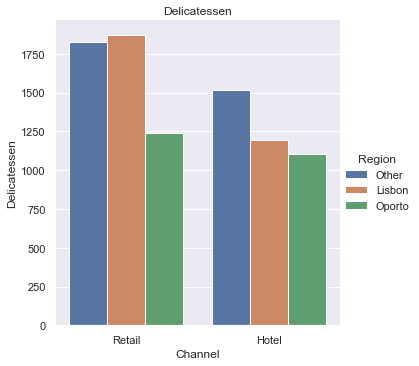

In [127]:
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=wholesaledf)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

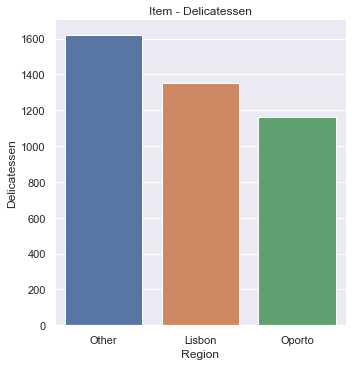

In [128]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

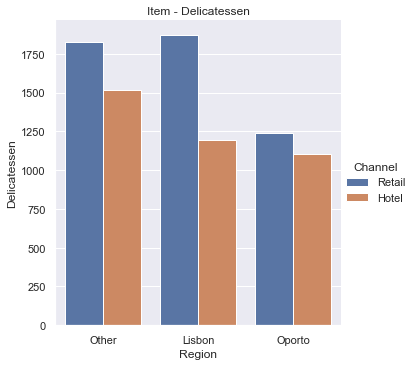

In [129]:
sns.catplot(x="Region", y="Delicatessen", hue='Channel', kind="bar", ci=None, data=wholesaledf)
plt.title('Item - Delicatessen')

Q. On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [130]:
corr_wholesale=wholesaledf.describe(include='all').T
corr_wholesale

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total Spending,440.0,NaN,NaN,NaN,33226.136364,26356.30173,904.0,17448.75,27492.0,41307.5,199891.0


In [131]:
print(corr_wholesale['std'])

Channel                      NaN
Region                       NaN
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total Spending       26356.30173
Name: std, dtype: object


Q. Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

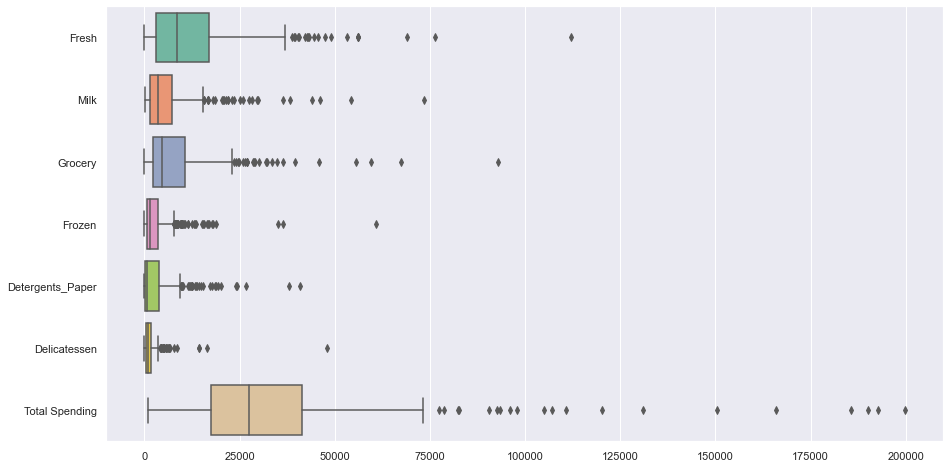

In [132]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wholesaledf, orient="h", palette="Set2")

In [136]:
productdf=wholesaledf.copy()

In [137]:
productdf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [144]:
productdf.drop(['Channel'],axis=1)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Other,12669,9656,7561,214,2674,1338,34112
1,Other,7057,9810,9568,1762,3293,1776,33266
2,Other,6353,8808,7684,2405,3516,7844,36610
3,Other,13265,1196,4221,6404,507,1788,27381
4,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...
435,Other,29703,12051,16027,13135,182,2204,73302
436,Other,39228,1431,764,4510,93,2346,48372
437,Other,14531,15488,30243,437,14841,1867,77407
438,Other,10290,1981,2232,1038,168,2125,17834


In [145]:
productdf.drop(['Region'],axis=1)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Retail,12669,9656,7561,214,2674,1338,34112
1,Retail,7057,9810,9568,1762,3293,1776,33266
2,Retail,6353,8808,7684,2405,3516,7844,36610
3,Hotel,13265,1196,4221,6404,507,1788,27381
4,Retail,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...
435,Hotel,29703,12051,16027,13135,182,2204,73302
436,Hotel,39228,1431,764,4510,93,2346,48372
437,Retail,14531,15488,30243,437,14841,1867,77407
438,Hotel,10290,1981,2232,1038,168,2125,17834


In [146]:
productdf.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [149]:
np.std(productdf['Fresh']) / np.mean(productdf['Fresh'])

1.0527196084948245

In [156]:
np.std(productdf['Milk']) / np.mean(productdf['Milk'])

1.2718508307424503

In [157]:
np.std(productdf['Grocery']) / np.mean(productdf['Grocery'])

1.193815447749267

In [158]:
np.std(productdf['Frozen']) / np.mean(productdf['Frozen'])

1.5785355298607762

In [159]:
np.std(productdf['Detergents_Paper']) / np.mean(productdf['Detergents_Paper'])

1.6527657881041729

In [160]:
np.std(productdf['Delicatessen']) / np.mean(productdf['Delicatessen'])

1.8473041039189306

Q. On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective